In [1]:
# Load dependencies
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal
from astropy.io import fits
import time
from cosmos_helper_funcs import *
from nonuniformity import *

In [30]:
home_dir = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Nonuniformity/HSHGRS'
gray_stacks = get_stacks(home_dir + '/Light Images')
dark_stacks = get_stacks(home_dir + '/Dark Images')
dsnu_stacks = get_stacks(home_dir + '/DSNU Images')
gray_stack_1 = gray_stacks[0]['imagestack']
dark_stack_1 = dark_stacks[0]['imagestack']
dsnu_stack_1 = dsnu_stacks[0]['imagestack']
# gray_stack_2 = gray_stacks[1]['imagestack']
# dark_stack_2 = dark_stacks[1]['imagestack']
# dsnu_stack_2 = dsnu_stacks[1]['imagestack']

Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Nonuniformity/HSHGRS/Light Images/calibrated_HSHG_RS_light_4000ms_-25C 2024-10-04 12_25_10.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Nonuniformity/HSHGRS/Dark Images/calibrated_HSHG_RS_dark_4000ms_-25C 2024-10-04 12_24_17.fits
Now reading /Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Analysis Images/Nonuniformity/HSHGRS/DSNU Images/calibrated_HSHG_RS_dark_1us_-25C 2024-10-04 11_46_09.fits


In [31]:
# Correct for any light source fluctuation between ramp days
# gray_stack_2 = gray_stack_2 * np.nanmean(gray_stack_1) / np.nanmean(gray_stack_2)
# gray_stack = np.concatenate((gray_stack_1, gray_stack_2), axis=0)
# dark_stack = np.concatenate((dark_stack_1, dark_stack_2), axis=0)
# dsnu_stack = np.concatenate((dsnu_stack_1, dsnu_stack_2), axis=0)
gray_stack = gray_stack_1
dark_stack = dark_stack_1
dsnu_stack = dsnu_stack_1

In [32]:
cms_defect_map_calibration_file = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Calibration/Defect Maps/defect_map_calibration_CMS.fits'
cms_defect_map_calibration = fits.getdata(cms_defect_map_calibration_file)
cms_defect_map_dark_file = '/Users/layden/Library/CloudStorage/Box-Box/Scientific CMOS - MKI ONLY (might contain EAR; ITAR)/Teledyne_COSMOS/Final Data Products/Calibration/Defect Maps/defect_map_dark_CMS.fits'
cms_defect_map_dark = fits.getdata(cms_defect_map_dark_file)


In [33]:
gray_stack_imgs = gray_stack * cms_defect_map_calibration * cms_defect_map_dark
dark_stack_imgs = dark_stack * cms_defect_map_calibration * cms_defect_map_dark
dsnu_stack_imgs = dsnu_stack * cms_defect_map_calibration * cms_defect_map_dark

PRNU:  nan
DSNU:  148.04649691776154


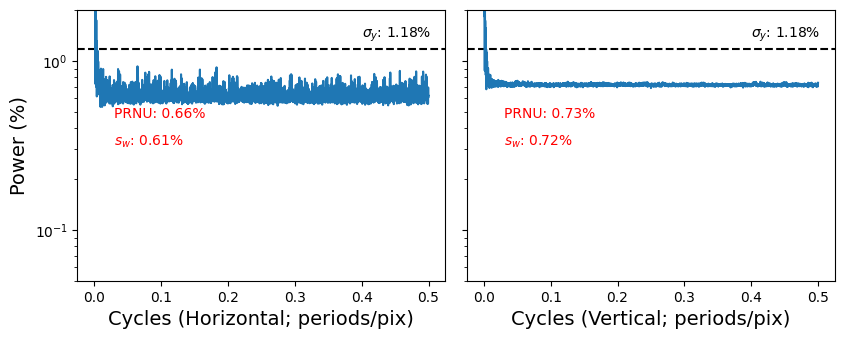

In [34]:
nonuniformity = NonuniformityCalc(gray_stack_imgs, dark_stack_imgs, dsnu_stack_imgs, num_imgs=22, do_filtering=False)
print("PRNU: ", nonuniformity.prnu)
print("DSNU: ", nonuniformity.dsnu)
nonuniformity.plot_gray_spectrograms()
# nonuniformity.plot_dsnu_spectrograms(gain=4.06)